## Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	
C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [82]:
import seaborn as sns

In [53]:
titan = pd.read_csv("titanic-data.csv")

In [54]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
def convertSexToVal (s):
    if s == 'male':
        return 1
    else :
        return 0

In [55]:
titan['SexVal']=titan['Sex'].map(convertSexToVal)

In [56]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexVal
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
group = titan.groupby('Survived')

In [11]:
group.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [38]:
survived = titan[titan.Survived == 1]

In [39]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
victim = titan[titan.Survived == 0]

In [42]:
victim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## 是否生还与船票费用的关系

In [80]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [98]:
survivedFare = survived['Fare']

In [87]:
survivedFare.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

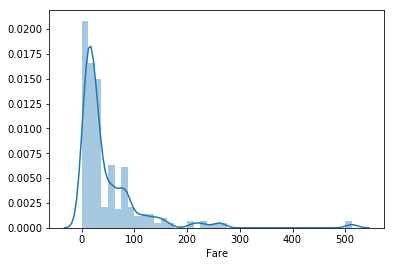

In [88]:
sns.distplot(survivedFare)

从图中可以看到，有部分费用异常高，可能影响结论，因此我们去除该部分值

In [104]:
def delOutlier (s):
    threshold = s.mean() + (2 * s.std())
    s = s[s < threshold]
    return s

In [105]:
survivedFare = delOutlier(survivedFare)

In [108]:
survivedFare.describe()

count    328.000000
mean      37.802998
std       36.289537
min        0.000000
25%       12.215625
50%       26.000000
75%       55.110425
max      164.866700
Name: Fare, dtype: float64

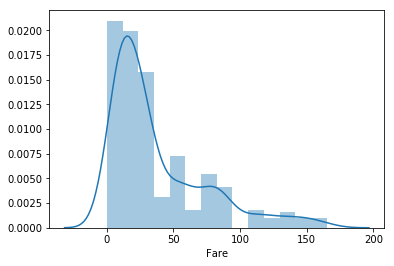

In [106]:
sns.distplot(survivedFare)

In [109]:
victimFare = victim['Fare']

In [110]:
victimFare.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

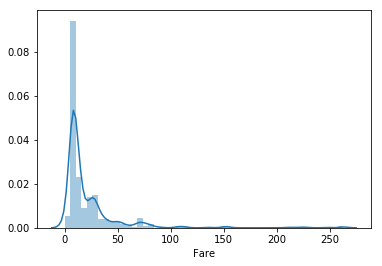

In [111]:
sns.distplot(victimFare)

In [112]:
victimFare = delOutlier(victimFare)

In [113]:
victimFare.describe()

count    534.000000
mean      17.952651
std       16.594741
min        0.000000
25%        7.854200
50%        9.831250
75%       25.466700
max       83.475000
Name: Fare, dtype: float64

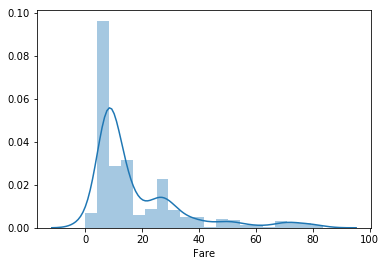

In [114]:
sns.distplot(victimFare)

In [148]:
def calcT(s1, s2) :
    n1 = s1.count()
    n2 = s2.count()
    std1 = s1.std()
    std2 = s2.std()
    sv1 = std1**2
    sv2 = std2**2
    tmp = ((n1-1)*sv1 + (n2-1)*sv2)/(n1+n2-2)*(1.0/n1 + 1.0/n2)
    t = (s1.mean()-s2.mean())/np.sqrt(tmp)
    return [t,n1+n2-2]

In [149]:
print calcT(survivedFare,victimFare)

[10.920098916822253, 860]


In [128]:
meanPair = pd.DataFrame([survivedFare.mean(), victimFare.mean()],columns=['meanVal'],index=['Survivor','Victim'])

In [129]:
meanPair

,meanVal
Survivor,37.802998
Victim,17.952651


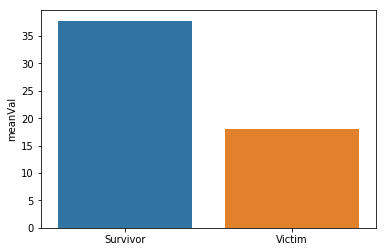

In [130]:
sns.barplot(x=meanPair.index, y=meanPair.meanVal)

可以看到，幸存者的平均费用要明显高于遇难者。

In [77]:
corr = corrcoef(titan.loc[:,['Pclass','Fare']].T)

In [78]:
corr

array([[ 1.        , -0.54949962],
       [-0.54949962,  1.        ]])